Nama : Umar Sabirin, NIM : H071201059, Kelas : Machine Learning B


Link Dataset : https://docs.google.com/spreadsheets/d/1DDzvXCNCfa95RJgieL8ZWOJ7WE7FXED0/edit?usp=sharing&ouid=103329956455291302334&rtpof=true&sd=true

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

**Load data**

In [2]:
data_location = '/content/DATA RUMAH.xlsx'
row_data = pd.read_excel(data_location, usecols=['NAMA RUMAH' ,'HARGA', 'LB', 'LT', 'KT', 'KM','GRS'])
row_data.columns = ['Nama Rumah' ,'Harga Rumah', 'Luas Bangunan', 'Luas Tanah', 'Kamar Tidur', 'Kamar Mandi', 'Garasi']

row_data.shape

(1010, 7)

In [3]:
#membaca data 5 teratas
row_data.head()

,Nama Rumah,Harga Rumah,Luas Bangunan,Luas Tanah,Kamar Tidur,Kamar Mandi,Garasi
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**Membersihkan data yang tidak lengkap (Jika ada)**

In [4]:
df = row_data.dropna(axis=0)
df.describe()

,Harga Rumah,Luas Bangunan,Luas Tanah,Kamar Tidur,Kamar Mandi,Garasi
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [5]:
print(df.dtypes)

Nama Rumah       object
Harga Rumah       int64
Luas Bangunan     int64
Luas Tanah        int64
Kamar Tidur       int64
Kamar Mandi       int64
Garasi            int64
dtype: object


**Menentukan variabel independen dan dependen**

In [6]:
#Menentukan varibel independen dari data sehingga, menghapus varibel dependen yaitu harga
x = df.drop(["Harga Rumah", "Nama Rumah"],axis = 1)
x.head()


,Luas Bangunan,Luas Tanah,Kamar Tidur,Kamar Mandi,Garasi
0,220,220,3,3,0
1,180,137,4,3,2
2,267,250,4,4,4
3,40,25,2,2,0
4,400,355,6,5,3


In [7]:
#Menampilkan data varibel dependen
y = df["Harga Rumah"]
y.head()

0    3800000000
1    4600000000
2    3000000000
3     430000000
4    9000000000
Name: Harga Rumah, dtype: int64

**Membagi data untuk training dan validasi**

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

In [9]:
train_x.shape

(808, 5)

In [10]:
test_x.shape

(202, 5)

**Membangun model dengan algoritma K-Nearest Neighbors**

In [11]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 2)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  1.2862439460825563e+19 
 Accuracy:  0.6129905249526334


**Menggunakan elbow method untuk menentukan nilai K terbaik**

In [12]:
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

**Menampilkan grafik nilai k berdasarkan MSE**

Text(0.5, 1.0, 'Elbow Curve for Test')

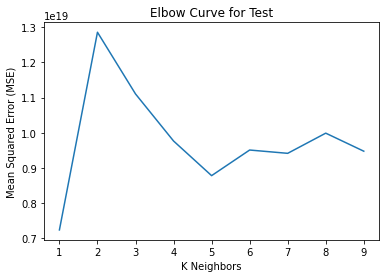

In [13]:
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

**Melakukan improvisasi dengan menerapkan nilai k yang menghasilkan MSE minimum**

In [14]:
new_model  = KNN_Reg(n_neighbors = 1)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2, '\n',
      'Accuracy of old model (%):', acc1, '\n Improvement (%):', (acc2-acc1))

 Accuracy of new model (%): 0.7825249414423282 
 Accuracy of old model (%): 0.6129905249526334 
 Improvement (%): 0.1695344164896948


**Menentukan hasil prediksi harga**

data_harga_rumah = [Luas Bangunan, Luas Tanah, Kamar Tidur, Kamar Mandi, Garasi]

In [20]:
data_harga_rumah = np.array([[220,220,3,3,1]])
pred_old = model.predict(data_harga_rumah)
pred_new = new_model.predict(data_harga_rumah)

print(' Hasil Prediksi harga rumah dengan old model: Rp', pred_old, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: Rp', pred_new, 'Juta')

 Hasil Prediksi harga rumah dengan old model: Rp [4.4e+09] Juta
 Hasil Prediksi harga rumah dengan new model: Rp [3.8e+09] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
